# Pulse Placement


The equations below are the equaitons to be solved for an efficient DPI solution. For those of who are not familiar with the DPI simulation, can take a look at the dpi_simulation.ipynb notebook prior to this.

$I_{syn}(t_1) = I_{syn}(t_0) \cdot f_{dt}$                                         in any case

$I_{syn}(t_1) = I_{syn}(t_1) + I_{ss} \cdot \overline{\overline{f_{charge}}}$                          if spike arrives


| Substitude                           | Formula                                                                                             |
| ------------------------------------ | --------------------------------------------------------------------------------------------------- |
| $$f_{dt}$$                           | $$exp \left( \dfrac{-dt}{\tau} \right)$$                                                            |
| $$\overline{\overline{f_{charge}}}$$ | $$exp \left( \dfrac{-(t_1-t_{pe})}{\tau} \right) - exp \left( \dfrac{-(t_1-t_{ps})}{\tau} \right)$$ |


The solution of the equations can be simplified or can be complicated depending on the place of the pulse assumed. In this test, 4 placement method are compared.

- Middle
- Start
- End
- Random


In [1]:
import numpy as np
from rockpool.timeseries import TSEvent, TSContinuous

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

import sys
sys.path.insert(
    0,
    "/home/ugurc/SynSense Dropbox/Ugurcan Cakal/repos/rockpool__dynapse/rockpool/devices/dynapse",
)

from utils import pulse_width_increment, spike_to_pulse

## Visualisation

The utility function below implemented to visualise the pulse inside the timebin.

In [2]:
from utils import pulse_placement
def visualise_pulse_placement(placement, dt=1e-3, t_pulse=1e-5, dummy=None):
    pulse = pulse_placement(placement, dt=dt)
    t_dis = pulse(t_pulse)
    t_start = dt - t_dis - t_pulse

    # Linearly Extended Pulse
    event = TSEvent(times=t_start, t_start=-5e-6, t_stop=dt + 5e-6, name="event")

    pulses = spike_to_pulse(
        event,
        dt=1e-6,
        pulse_width=t_pulse,
        amplitude=1,
        name=f"Pulse placement : {placement}",
    )

    pulses.plot(stagger=1.5)
    plt.ylabel("Amplitude(V)")
    plt.show()

## Pulse in the middle

If the pulse is assumed to be in the middle of the timebin, it will probably one of the most convenient assumption if we isolate the timebin from the rest of the simulation. Since the spike generation is assumed to be a poisson process, we can say that spikes are independent and identically distributed random variables. Therefore, we can expect that the exact distribution of the places of the spikes will be Gaussian, with a mean of dt/2. However, this applies only if we consider the simulation timestep and ignore the rest of the simulation duration. The pulse right in the middle of the timebin is visualised below.

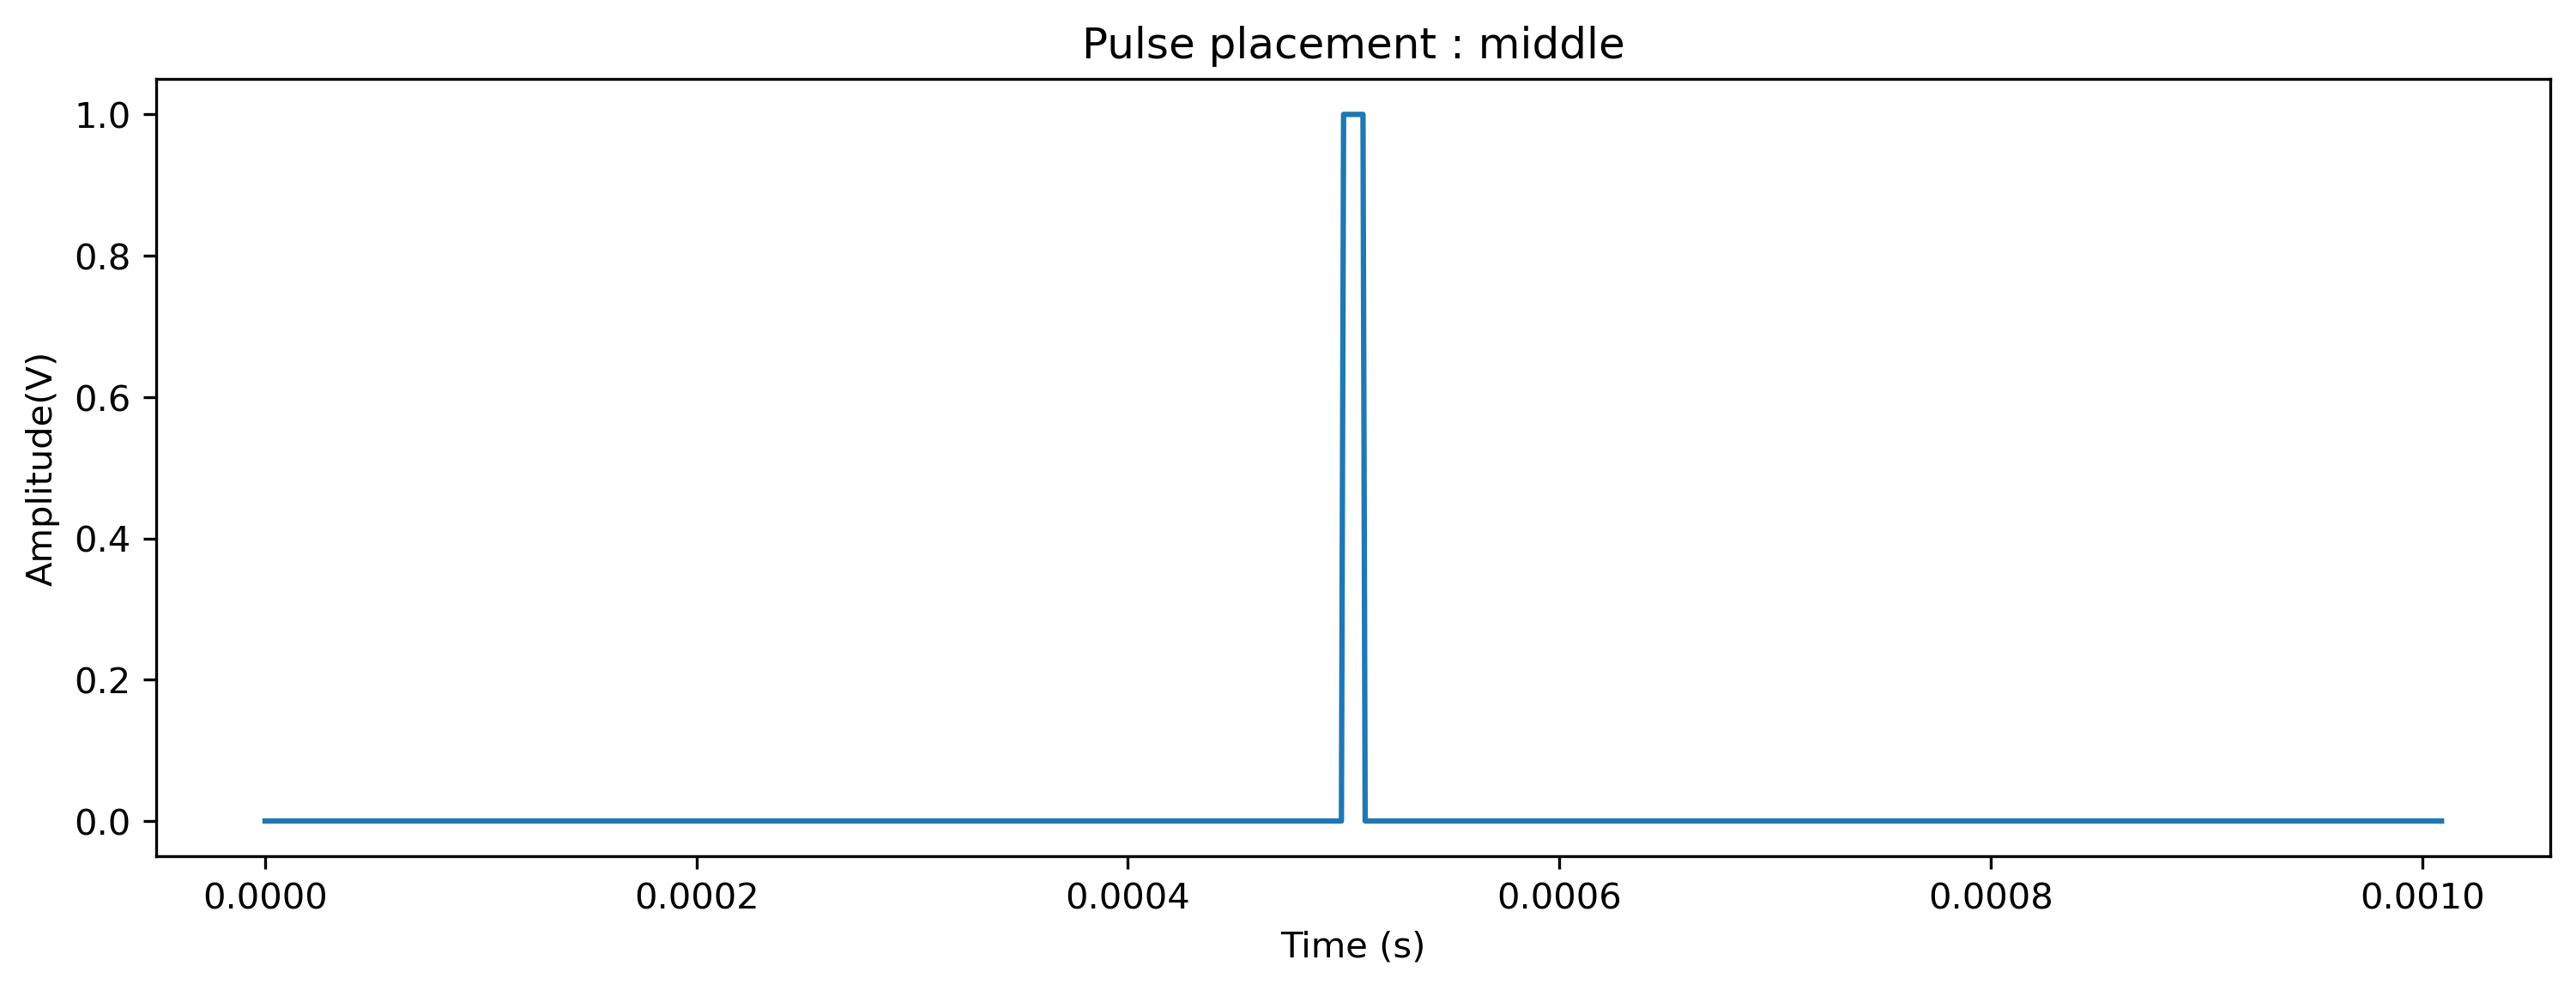

In [3]:
visualise_pulse_placement("middle")

## Pulse at the beginning

Considering that the simulation duration is generally much more bigger than the simulation timestep, the exact place of the pulse does not really matter. In Figure below, the pulse at the beginning of the timebin is visualised. It’s nothing but the dt/2 ofsetted version of the pulse in the middle case.

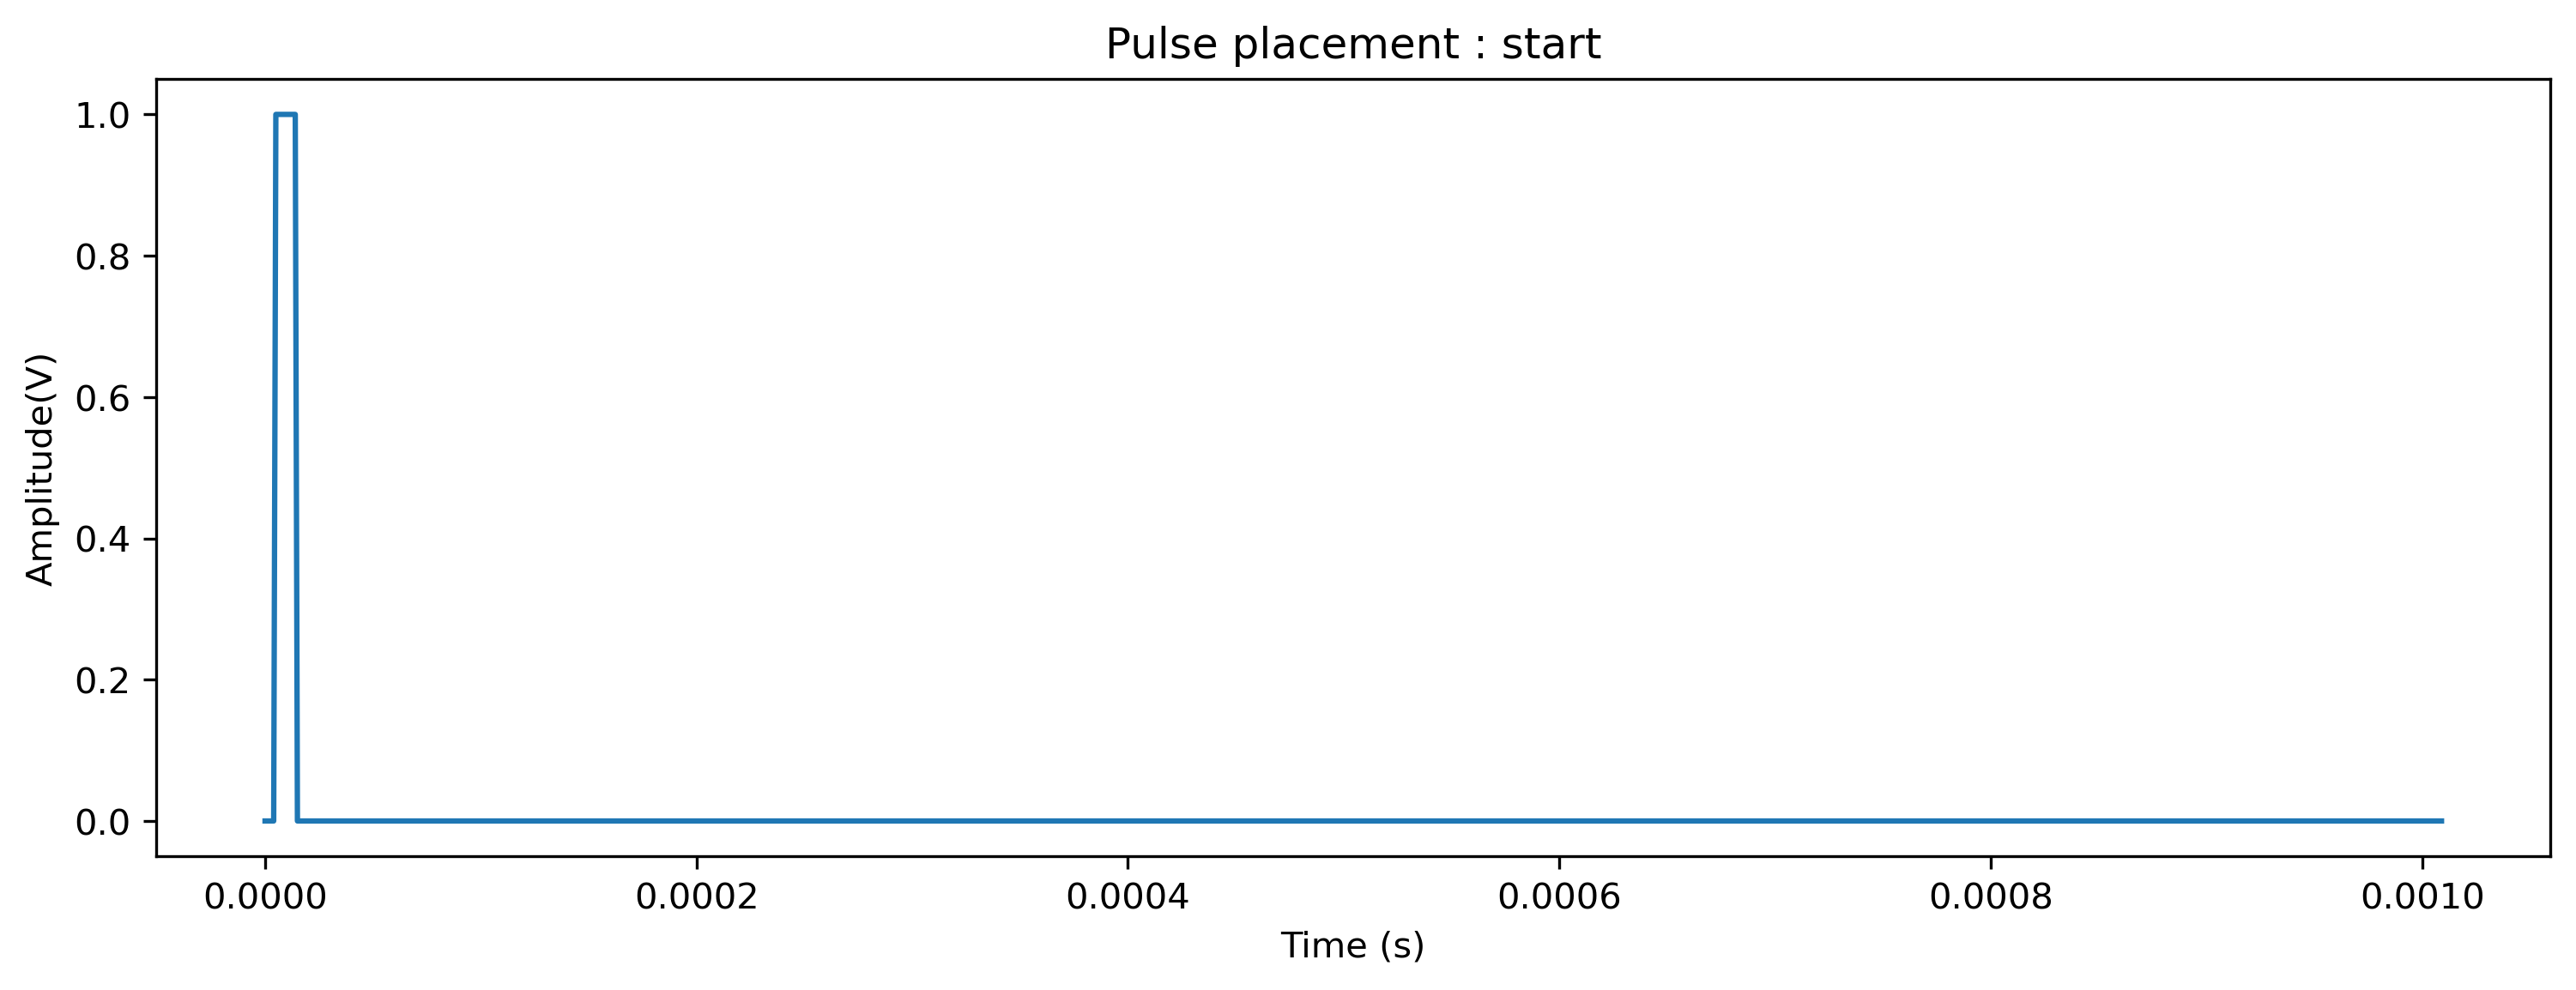

In [4]:
visualise_pulse_placement("start")

## Pulse at the end

The pulse at the end of the timebin case has a superiority over the others. Looking at the $\overline{\overline{f_{charge}}}$
term in the final equation, we can see that if the pulse is placed at the end, $t_1 = t_{pe}$. As a result, one exponential function is omitted and the computation of the term gets easier.

$$\overline{\overline{f_{charge}}} = exp \left( \dfrac{-(t_1-t_{pe})}{\tau} \right) - exp \left( \dfrac{-(t_1-t_{ps})}{\tau} \right)$$

$$\overline{\overline{f_{charge}}} = exp \left( \dfrac{-(t_{pe}-t_{pe})}{\tau} \right) - exp \left( \dfrac{-(t_{pe}-t_{ps})}{\tau} \right)$$

$$\overline{\overline{f_{charge}}} = 1 - exp \left( \dfrac{-t_{pulse}}{\tau} \right)$$

The visual representation of the pulse at the end is given below.

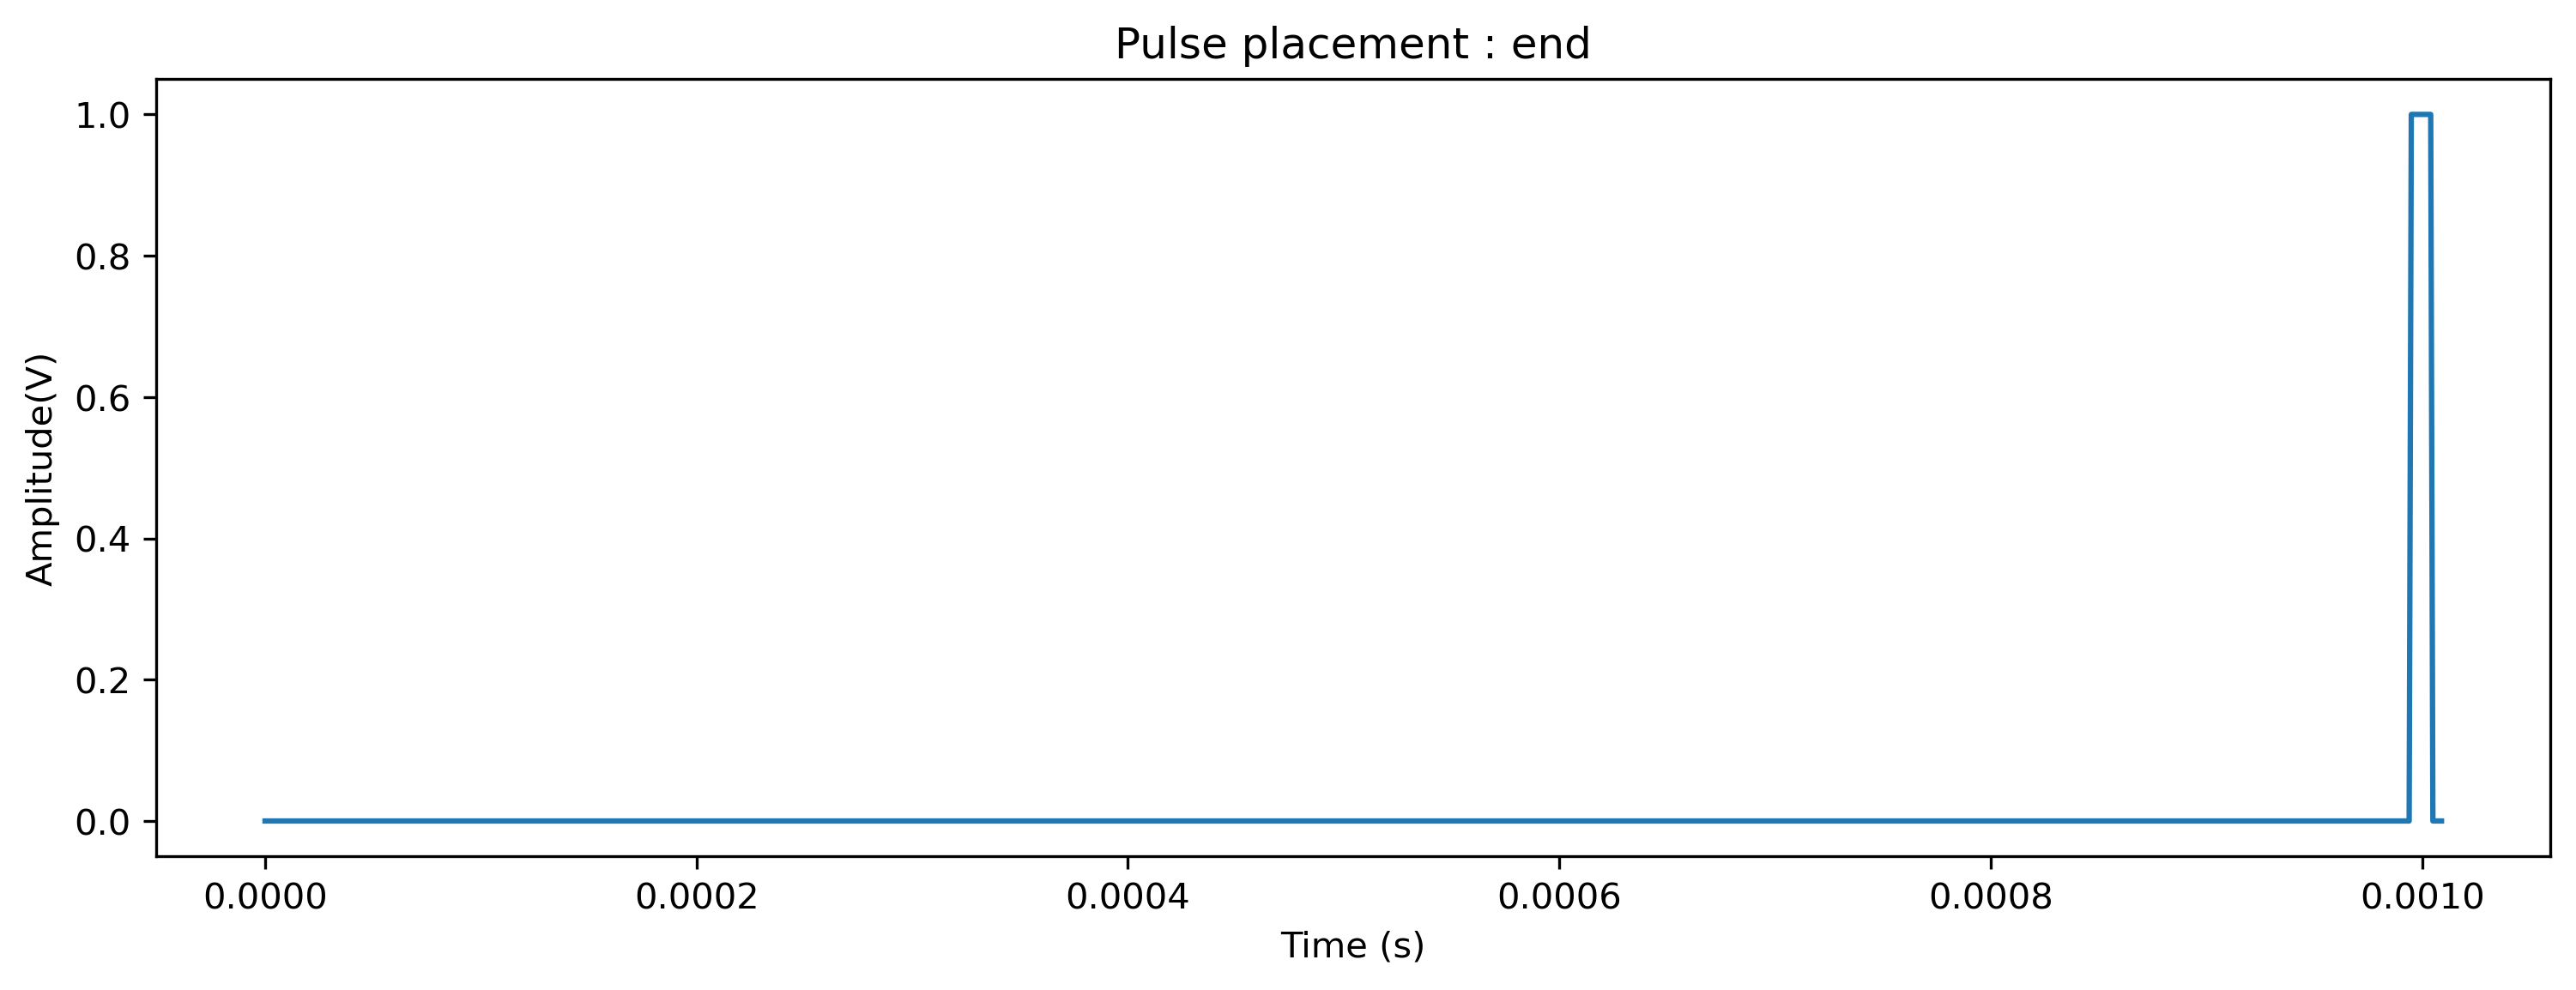

In [5]:
visualise_pulse_placement("end")

## Pulse at a Random Place

Lastly, we can place the pulse at a random place and it can effectively reproduce the exact spiking activity but it requires a random number generation overhead at each timestep, which makes it computationally the hardest one. 

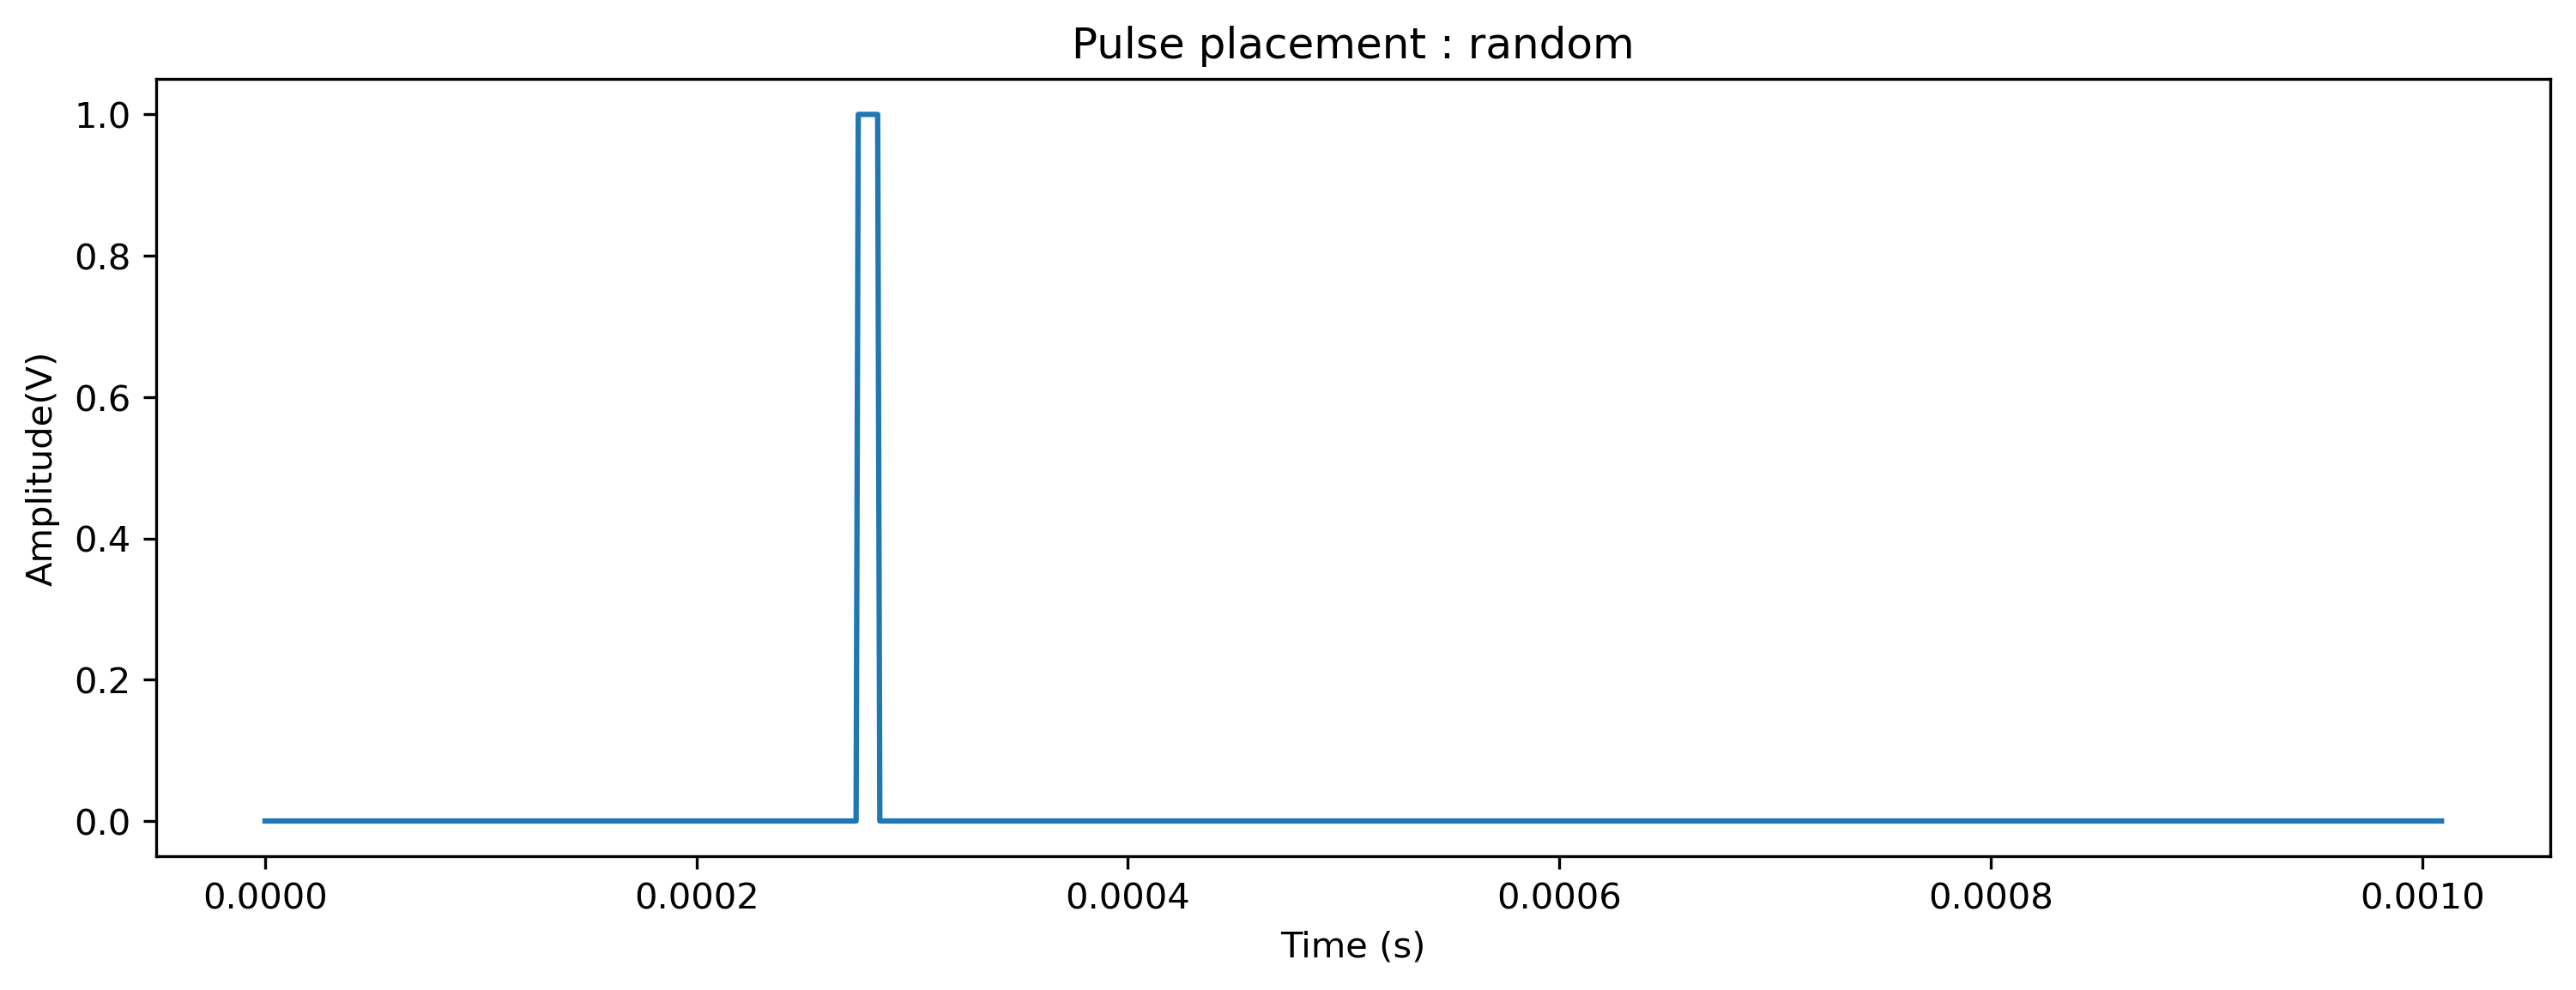

In [6]:
visualise_pulse_placement("random")

## Playground

One can play with the parameters and see the effect. The dummy slider is there to regenerate the random pulse. It does not have any effect on the pulse or the timebin

In [7]:
from ipywidgets import interact_manual, interact, widgets

dt = widgets.FloatLogSlider(min=-6, max=-2, value=1e-3, readout_format=".1e")
t_pulse = widgets.FloatLogSlider(min=-6, max=-3, value=1e-5, readout_format=".1e")
placement = widgets.RadioButtons(
    options=["middle", "start", "end", "random"],
    value="middle",
    description="Placement",
)

interact(visualise_pulse_placement,placement=placement, dt=dt, t_pulse=t_pulse, dummy=1);

interactive(children=(RadioButtons(description='Placement', options=('middle', 'start', 'end', 'random'), valu…